In [1]:
# this is where the final project will go lol

Welcome to 'HOW TALL ARE YOU?'

When entering your height, enter feet first, then space, and then inches like this: 6 1
This height would be 6 feet and 1 inches
Enter your height: 
5 10
When entering sex, input 'female' or 'male' without the parentheses.

Enter your sex here: 
female
When entering your state, enter the full name with the first letter capitalized like this:
Texas
Enter your state: 
Texas
Enter a country that you want to compare your height to.
It cannot be the United States.
When entering the country, make sure only the first letter is capitalized like this:
Australia

Enter a country: Australia


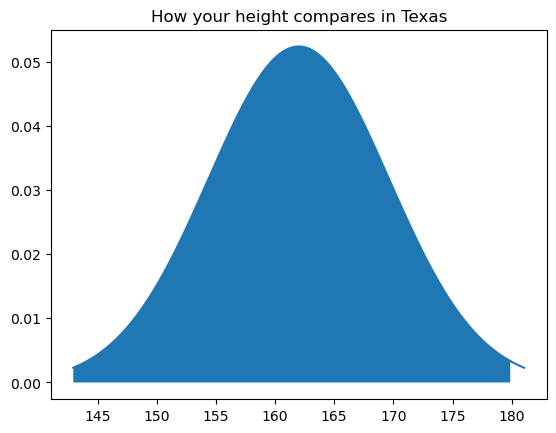

You are taller than 98.10% of the female population in Australia. YAY!
In Texas, out of a 100 females, you are taller than 98 of them, and you are shorter than 2 of them.


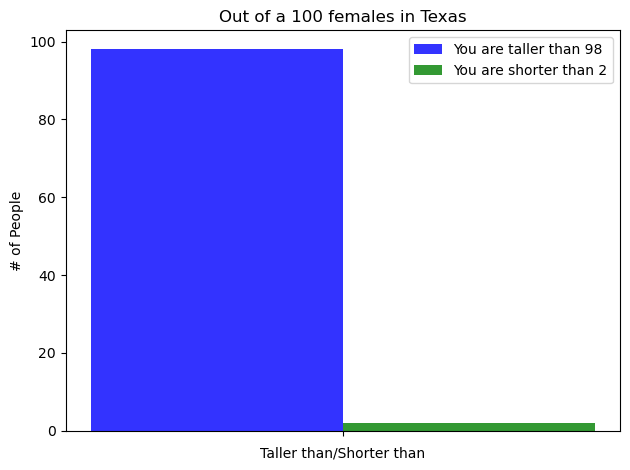

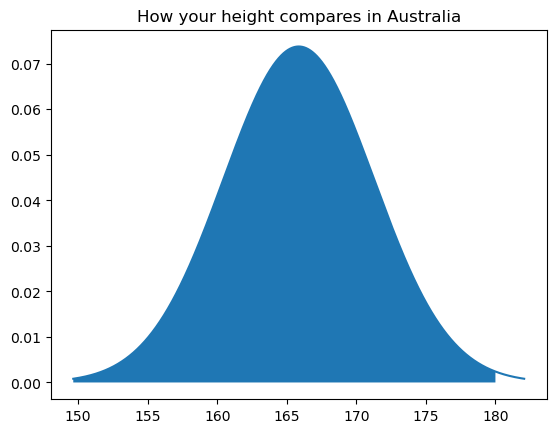

You are taller than 98.60% of the female population in Australia. YAY!
In Australia, out of a 100 females, you are taller than 99 of them, and you are shorter than 1 of them.


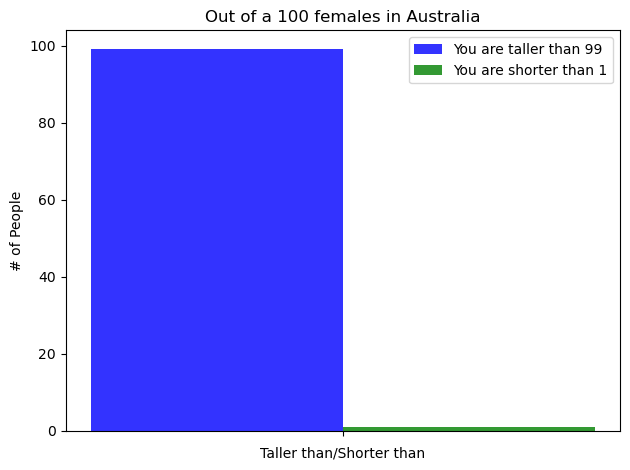

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import matplotlib.pyplot as plt; plt.rcdefaults()

# import all files
# cstuff for US data
url = 'csvData.csv'
df = pd.read_csv(url)

df['menHeight'].replace('177-179',float('178.0'),inplace=True)
df['menHeight'].replace('179+',float('180.0'),inplace=True)
df['menHeight'].replace('177-',float('176.0'),inplace=True)

df['womenHeight'].replace('163-164',float('163.5'),inplace=True)
df['womenHeight'].replace('164+',float('165'),inplace=True)
df['womenHeight'].replace('163-',float('162'),inplace=True)

average_men = df['menHeight'].mean()
average_woman = df['womenHeight'].mean()

df['womenHeight'].replace(np.nan,average_woman,inplace=True)

# looked up standard deviations for the US because they were not in my data
sdmen = 7.62
sdwomen = 6.35

statesfemale = {}
for x in range(50):
    statesfemale[df['State'][x]]= df['womenHeight'][x]

statesmale = {}
for x in range(50):
    statesmale[df['State'][x]]= df['menHeight'][x]




# data stuff for female height globally
dfgw = pd.read_csv('femaleheight.csv')

for x in range(len(dfgw['presentheight'])):
    dfgw['presentheight'][x] = float(dfgw['presentheight'][x][:6])
dfgw.head(10)
f_mean_global = dfgw['presentheight'].mean()
fglobalsum = 0
for x in dfgw['presentheight']:
    fglobalsum += (abs(x-f_mean_global))**(2)

sdfglobal = (fglobalsum/208)**(.5)

countryfemales = {}
for x in range(208):
    countryfemales[dfgw['country'][x]]= dfgw['presentheight'][x]





# data stuff for mal height globally
dfgm = pd.read_csv('maleheight.csv')

for x in range(len(dfgm['presentheight'])):
    dfgm['presentheight'][x] = float(dfgm['presentheight'][x][:6])
dfgm.head(10)
m_mean_global = dfgm['presentheight'].mean()
mglobalsum = 0
for x in dfgm['presentheight']:
    mglobalsum += (abs(x-m_mean_global))**(2)
sdmglobal = (mglobalsum/208)**(.5)

countrymales = {}
for x in range(208):
    countrymales[dfgm['country'][x]]= dfgm['presentheight'][x]

    
# start of the program
print("Welcome to 'HOW TALL ARE YOU?'\n")
print('When entering your height, enter feet first, then space, and then inches like this: 6 1\nThis height would be 6 feet and 1 inches')
height = list(input('Enter your height: \n').split())
height[0] = float(height[(0)])*12 * 2.54
height[1] = float(height[1])*2.54
user_height = sum(height)
print("When entering sex, input 'female' or 'male' without the parentheses.\n")
sex = input('Enter your sex here: \n')
print('When entering your state, enter the full name with the first letter capitalized like this:\nTexas')
state = str(input('Enter your state: \n'))
print('Enter a country that you want to compare your height to.\nIt cannot be the United States.\nWhen entering the country, make sure only the first letter is capitalized like this:\nAustralia\n')
country = input('Enter a country: ')


# define functions
def draw_z_score(x, cond, mu, sigma, title):
    y = norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.fill_between(z, 0, norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()

# for males
if sex == 'male':
    # a normal distribution with shaded area
    
    amen = statesmale['{}'.format(state)]
    zscore = (user_height - amen)/7.62
    x = np.arange(amen-(3*sdmen),amen+(3*sdmen),0.001)
    z0 = user_height+(zscore)
    draw_z_score(x, x<z0,float(amen),7.62,'How your height compares in {}'.format(state))
    percentage = (round(norm.cdf(zscore),3)*100)
    if 100.0 > percentage > 99.0:
        peopletaller = 99
    elif percentage == 100.0:
        peopletaller = 99
        percentage = 99.9
    else:
        peopletaller = round(percentage)
    peopleshorter = 100-peopletaller
    print('You are taller than {:.2f}% of the female population in {}. YAY!'.format(percentage,country))
    print('In {}, out of a 100 males, you are taller than {} of them, and you are shorter than {} of them.'.format(state,int(peopletaller),int(peopleshorter)))
    
    
    # a bar graph
    
    n_groups = 1

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, peopletaller, bar_width,
    alpha=opacity,
    color='b',
    label='You are taller than {}'.format(int(peopletaller)))

    rects2 = plt.bar(index + bar_width, peopleshorter, bar_width,
    alpha=opacity,
    color='g',
    label='You are shorter than {}'.format(int(peopleshorter)))

    plt.xlabel('Taller than/Shorter than')
    plt.ylabel('# of People')
    plt.title('Out of a 100 males in {}'.format(state))
    plt.xticks(index + bar_width/2, '')

    plt.legend()

    plt.tight_layout()
    plt.show()

    # global bar and normal distribution
    # I use the average standard deviation by combining the global
    # and the US deviations.
    sdmglobal = (((7.62**(2))+(sdmglobal**(2)))/2)**(.5)
    amen = countrymales['{}'.format(country)]
    zscore = (user_height - amen)/sdmglobal
    x = np.arange(amen-(3*sdmglobal),amen+(3*sdmglobal),0.001)
    z0 = user_height+(zscore)
    draw_z_score(x, x<z0,float(amen),sdmglobal,'How your height compares in {}'.format(country))
    percentage = (round(norm.cdf(zscore),3)*100)
    if 100.0 > percentage > 99.0:
        peopletaller = 99
    elif percentage == 100.0:
        peopletaller = 99
        percentage = 99.9
    else:
        peopletaller = round(percentage)
    peopleshorter = 100-peopletaller
    print('You are taller than {:.2f}% of the female population in {}. YAY!'.format(percentage,country))
    print('In {}, out of a 100 males, you are taller than {} of them, and you are shorter than {} of them.'.format(country,int(peopletaller),int(peopleshorter)))
    
    # a bar graph
    
    n_groups = 1

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, peopletaller, bar_width,
    alpha=opacity,
    color='b',
    label='You are taller than {}'.format(int(peopletaller)))

    rects2 = plt.bar(index + bar_width, peopleshorter, bar_width,
    alpha=opacity,
    color='g',
    label='You are shorter than {}'.format(int(peopleshorter)))

    plt.xlabel('Taller than/Shorter than')
    plt.ylabel('# of People')
    plt.title('Out of a 100 males in {}'.format(country))
    plt.xticks(index + bar_width/2, '')

    plt.legend()

    plt.tight_layout()
    plt.show()
    
    
    
# for females
if sex == 'female':
    
    # a normal distribution with shaded area
    
    awomen = statesfemale['{}'.format(state)]
    zscore = (user_height - awomen)/7.62
    x = np.arange(awomen-(3*sdwomen),awomen+(3*sdwomen),0.001)
    z0 = user_height+(zscore)
    draw_z_score(x, x<z0,float(awomen),7.62,'How your height compares in {}'.format(state))
    percentage = (round(norm.cdf(zscore),3)*100)
    if 100.0 > percentage > 99.0:
        peopletaller = 99
    elif percentage == 100.0:
        peopletaller = 99
        percentage = 99.9
    else:
        peopletaller = round(percentage)
    peopleshorter = 100-peopletaller
    print('You are taller than {:.2f}% of the female population in {}. YAY!'.format(percentage,country))
    print('In {}, out of a 100 females, you are taller than {} of them, and you are shorter than {} of them.'.format(state,int(peopletaller),int(peopleshorter)))
    
    
    # a bar graph
    
    n_groups = 1

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, peopletaller, bar_width,
    alpha=opacity,
    color='b',
    label='You are taller than {}'.format(int(peopletaller)))

    rects2 = plt.bar(index + bar_width, peopleshorter, bar_width,
    alpha=opacity,
    color='g',
    label='You are shorter than {}'.format(int(peopleshorter)))

    plt.xlabel('Taller than/Shorter than')
    plt.ylabel('# of People')
    plt.title('Out of a 100 females in {}'.format(state))
    plt.xticks(index + bar_width/2, '')

    plt.legend()

    plt.tight_layout()
    plt.show()

    # global bar and normal distribution
    # I use the average standard deviation by combining the global
    # and the US deviations.
    sdfglobal = (((sdwomen**(2))+(sdfglobal**(2)))/2)**(.5)
    awomen = countryfemales['{}'.format(country)]
    zscore = (user_height - awomen)/sdfglobal
    x = np.arange(awomen-(3*sdfglobal),awomen+(3*sdfglobal),0.001)
    z0 = user_height+(zscore)
    draw_z_score(x, x<z0,float(awomen),sdfglobal,'How your height compares in {}'.format(country))
    percentage = (round(norm.cdf(zscore),3)*100)
    if 100.0 > percentage > 99.0:
        peopletaller = 99
    elif percentage == 100.0:
        peopletaller = 99
        percentage = 99.9
    else:
        peopletaller = round(percentage)
    peopleshorter = 100-peopletaller
    print('You are taller than {:.2f}% of the female population in {}. YAY!'.format(percentage,country))
    print('In {}, out of a 100 females, you are taller than {} of them, and you are shorter than {} of them.'.format(country,int(peopletaller),int(peopleshorter)))
    
    # a bar graph
    
    n_groups = 1

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, peopletaller, bar_width,
    alpha=opacity,
    color='b',
    label='You are taller than {}'.format(int(peopletaller)))

    rects2 = plt.bar(index + bar_width, peopleshorter, bar_width,
    alpha=opacity,
    color='g',
    label='You are shorter than {}'.format(int(peopleshorter)))

    plt.xlabel('Taller than/Shorter than')
    plt.ylabel('# of People')
    plt.title('Out of a 100 females in {}'.format(country))
    plt.xticks(index + bar_width/2, '')

    plt.legend()

    plt.tight_layout()
    plt.show()
    
    
    
    